In [69]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [70]:
log_data=pd.read_csv('../Datas/log_final.csv',header=None)

In [71]:
log_data

,0,1,2,3
0,research1,1592584549387,2466395400,...
1,busanmovie3,1592584552882,60429700,...
2,research5,1592584553081,47762700,...
3,research9,1592584553282,45952100,...
4,research1,1592584553459,30488300,...
...,...,...,...,...
3995,endangeredanimals1,1592585230710,26005400,...
3996,CulturalAssets,1592585230884,35342200,...
3997,busanmovie8,1592585231057,117666200,...
3998,tourguide,1592585231304,27038400,...


In [72]:
log_data.columns=['Dataset','Query Time','Execution Time','ManagerId']

In [73]:
log_data.info

<bound method DataFrame.info of                  Dataset     Query Time  Execution Time ManagerId
0              research1  1592584549387      2466395400       ...
1            busanmovie3  1592584552882        60429700       ...
2              research5  1592584553081        47762700       ...
3              research9  1592584553282        45952100       ...
4              research1  1592584553459        30488300       ...
...                  ...            ...             ...       ...
3995  endangeredanimals1  1592585230710        26005400       ...
3996      CulturalAssets  1592585230884        35342200       ...
3997         busanmovie8  1592585231057       117666200       ...
3998           tourguide  1592585231304        27038400       ...
3999  endangeredanimals1  1592585231474        25015300       ...

[4000 rows x 4 columns]>

In [74]:
log_data.describe()

,Query Time,Execution Time
count,4.000000e+03,4.000000e+03
mean,1.592585e+12,3.859154e+07
std,1.955934e+05,7.410277e+07
min,1.592585e+12,1.964520e+07
25%,1.592585e+12,2.721360e+07
50%,1.592585e+12,2.899590e+07
75%,1.592585e+12,3.109592e+07
max,1.592585e+12,2.466395e+09


In [75]:
X=log_data[['Dataset','Query Time','Execution Time']]

In [76]:
X

,Dataset,Query Time,Execution Time
0,research1,1592584549387,2466395400
1,busanmovie3,1592584552882,60429700
2,research5,1592584553081,47762700
3,research9,1592584553282,45952100
4,research1,1592584553459,30488300
...,...,...,...
3995,endangeredanimals1,1592585230710,26005400
3996,CulturalAssets,1592585230884,35342200
3997,busanmovie8,1592585231057,117666200
3998,tourguide,1592585231304,27038400


In [77]:
X['Query Time'].astype(float)

0       1.592585e+12
1       1.592585e+12
2       1.592585e+12
3       1.592585e+12
4       1.592585e+12
            ...     
3995    1.592585e+12
3996    1.592585e+12
3997    1.592585e+12
3998    1.592585e+12
3999    1.592585e+12
Name: Query Time, Length: 4000, dtype: float64

In [78]:
X.describe()

,Query Time,Execution Time
count,4.000000e+03,4.000000e+03
mean,1.592585e+12,3.859154e+07
std,1.955934e+05,7.410277e+07
min,1.592585e+12,1.964520e+07
25%,1.592585e+12,2.721360e+07
50%,1.592585e+12,2.899590e+07
75%,1.592585e+12,3.109592e+07
max,1.592585e+12,2.466395e+09


In [79]:
execute_mean=X[['Execution Time']].mean()
execute_std=X[['Execution Time']].std()
X[['Execution Time']]=(X[['Execution Time']]-execute_mean)/execute_std * 10

C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [80]:
query_mean=X[['Query Time']].mean()
query_std=X[['Query Time']].std()
X[['Query Time']]=(X[['Query Time']]-query_mean)/query_std

In [81]:
outliar_removed_index=X[X[['Execution Time']]<2]['Execution Time'].dropna().index
X=X.iloc[outliar_removed_index]

In [82]:
Dataset_Query=X.groupby('Dataset')['Query Time'].mean().to_frame().reset_index()

In [83]:
Dataset_Execution=X.groupby('Dataset')['Execution Time'].mean().to_frame().reset_index()

In [84]:
Dataset_Query_Frequency=X.groupby('Dataset')['Query Time'].count().to_frame().reset_index()
Dataset_Query_Frequency.rename(columns = {'Query Time' : 'Query Count'}, inplace = True)

In [85]:
X=pd.merge(Dataset_Query,Dataset_Execution,on='Dataset')
X=pd.merge(X,Dataset_Query_Frequency,on='Dataset')

In [86]:
count_mean=X[['Query Count']].mean()
count_std=X[['Query Count']].std()
X[['Query Count']]=(X[['Query Count']]-count_mean)/count_std

In [87]:
X

,Dataset,Query Time,Execution Time,Query Count
0,CinemaMap,0.123626,-1.561069,-0.948125
1,Cinemap,0.303268,-1.056727,-0.391035
2,CulturalAssets,0.317496,-0.030028,-0.391035
3,ETCCutSlope,-0.168982,0.759824,-0.948125
4,Exhibit,0.447855,1.883910,-0.992106
5,ExhibitionArea,-0.094992,-1.304808,-0.420355
6,Gallery,0.302616,-1.565275,-0.948125
7,GeneralStructureCutSlope,-0.557785,-1.105045,-0.977446
8,GenreClassificationRule,0.543691,-1.853242,-0.977446
9,LocationInBusan2,-0.101782,-1.186111,-0.420355


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002786B69C7C8>]],
      dtype=object)

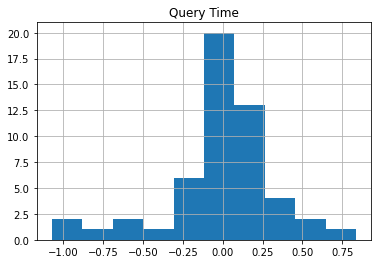

In [88]:
X[['Query Time']].hist()

In [89]:
hot_execution_index=X[X[['Execution Time']]>X[['Execution Time']].mean()]['Execution Time'].dropna().index

In [90]:
hot_execution_index

Int64Index([1, 2, 3, 4, 15, 17, 21, 22, 32, 35, 36, 50], dtype='int64')

In [91]:
hot_query_index=X[X[['Query Time']]>X[['Query Time']].mean()]['Query Time'].dropna().index

In [92]:
hot_query_index

Int64Index([ 0,  1,  2,  4,  6,  8, 10, 11, 14, 15, 19, 20, 23, 25, 26, 27, 28,
            29, 32, 33, 34, 36, 37, 39, 45, 49, 50, 51],
           dtype='int64')

In [93]:
hot_count_index=X[X[['Query Count']]>X[['Query Count']].mean()]['Query Count'].dropna().index

In [94]:
hot_count_index

Int64Index([23, 24, 25, 26, 27, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 47,
            48, 49, 50, 51],
           dtype='int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002786B74F988>]],
      dtype=object)

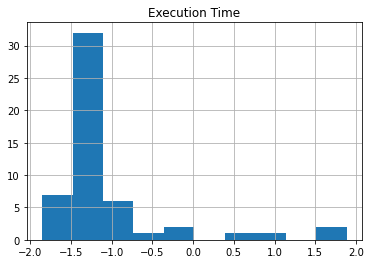

In [95]:
X[['Execution Time']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002786B7A2788>]],
      dtype=object)

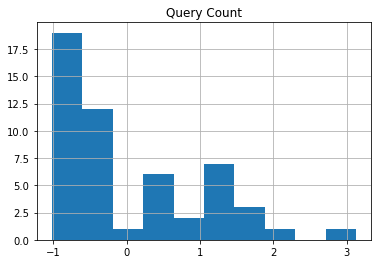

In [96]:
X[['Query Count']].hist()

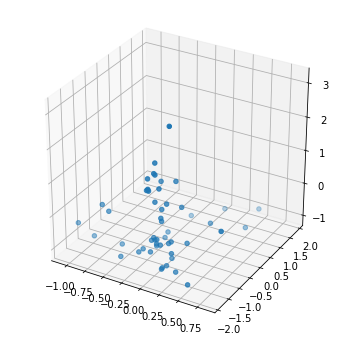

In [97]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[["Query Time"]],X[["Execution Time"]],X[["Query Count"]])
plt.show()

In [98]:
X

,Dataset,Query Time,Execution Time,Query Count
0,CinemaMap,0.123626,-1.561069,-0.948125
1,Cinemap,0.303268,-1.056727,-0.391035
2,CulturalAssets,0.317496,-0.030028,-0.391035
3,ETCCutSlope,-0.168982,0.759824,-0.948125
4,Exhibit,0.447855,1.883910,-0.992106
5,ExhibitionArea,-0.094992,-1.304808,-0.420355
6,Gallery,0.302616,-1.565275,-0.948125
7,GeneralStructureCutSlope,-0.557785,-1.105045,-0.977446
8,GenreClassificationRule,0.543691,-1.853242,-0.977446
9,LocationInBusan2,-0.101782,-1.186111,-0.420355


In [99]:
Train_X=X[["Query Time", "Execution Time", "Query Count"]]

{0, -1}
[ 0  0 -1 -1 -1  0  0  0 -1  0  0  0 -1  0  0 -1  0  0 -1  0  0 -1 -1 -1
 -1 -1 -1 -1  0  0  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  0 -1
 -1 -1 -1 -1]


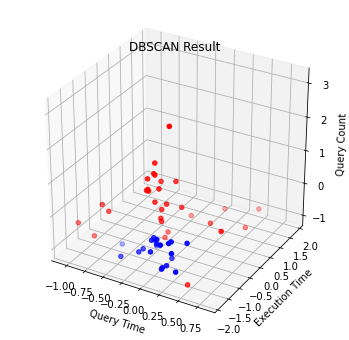

In [108]:
db = DBSCAN(eps=0.6, min_samples=15).fit(Train_X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(set(labels))
n_clusters_ = len(set(labels))
print(labels)

groups={}

for label in set(labels):
    groups[label]=[];

for index in range(len(Train_X)):
    groups[labels[index]].append(index) 

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
color=['b','r','g']
for index, group in enumerate(groups.values()):
    xy=Train_X.loc[group]
    ax.scatter(xy[["Query Time"]],xy[["Execution Time"]],xy[["Query Count"]], 'o',c=color[index])

    
ax.set_xlabel("Query Time");
ax.set_ylabel("Execution Time");
ax.set_zlabel("Query Count");
ax.set_title("K-means result");
plt.title('DBSCAN Result')
plt.show()